In this document I will use common python functions to generate samples from distributions, and demonstrate how we can sample from copulas.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Uniform Random Variables

As we mentioned in class, the bedrock of many sampling strategies is sampling a uniform random variable between 0 and 1. We do this using the function `np.random.uniform(low = 0, high = 1, size = N)`, which generates a list of `N` uniform random variables between 0 and 1.

In [5]:
N = 10
X = np.random.uniform(low = 0, high = 1, size = N)
print(X)

[ 0.06466802  0.9655033   0.60206399  0.24339412  0.33611013  0.46183926
  0.59617612  0.53532382  0.73228922  0.22745996]


As a result, we can readily generate a lot of samples.

In [8]:
N = 10**4
df = np.random.uniform(low = 0, high = 1, size = N)
print(df)

[ 0.53553811  0.86239959  0.88045936 ...,  0.05836941  0.11535896
  0.48871731]


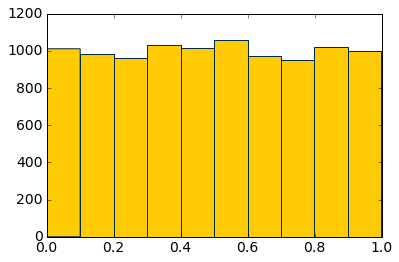

In [17]:
maize = "#ffcb05"
blue = "#00274c"
plt.hist(df, facecolor=maize, edgecolor=blue)
plt.show()

To make an array of multiple variables we can pass to the `random.uniform` function a list that has the number of rows and columns in the desired sample set:

In [22]:
N = 10**4
df = np.random.uniform(low = 0, high = 1, size = [N, 2])
print(df)

[[ 0.77266261  0.37832231]
 [ 0.4342936   0.39728782]
 [ 0.35900068  0.47932156]
 ..., 
 [ 0.30188779  0.40068993]
 [ 0.91323391  0.78697162]
 [ 0.15798953  0.76167739]]


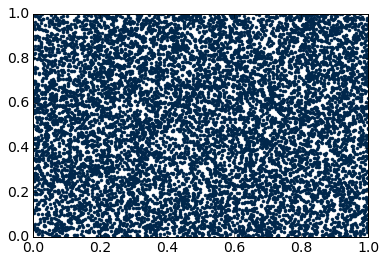

In [26]:
plt.plot(df[:,0], df[:,1], '.', color=blue)
plt.show()

Now we will change the limits of the uniform random variables. This time we sample uniform random variables in the range $[-5,6]$ and $[2,3]$. To do this we need to call the uniform function twice:

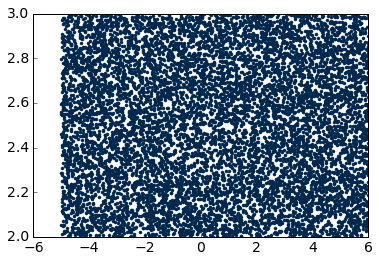

In [37]:
df = np.transpose(np.array([np.random.uniform(low = -5, high = 6, size = N), 
                            np.random.uniform(low = 2, high = 3, size = N)]))
plt.plot(df[:,0], df[:,1], '.', color=blue)
plt.show()

To evaluate the PDF, CDF, and inverse CDF for a uniform random variable we can use SciPy's `stats.uniform` library.

- `uniform.pdf(x, loc=0, scale = 1)` returns the probability density for a uniform random variable between `loc` and `loc+scale`
- `uniform.cdf(x, loc=0, scale = 1)` returns the cumulative distribution for a uniform random variable between `loc` and `loc+scale`
- `uniform.sf(x, loc=0, scale = 1)` returns the survival function (1-CDF) for a uniform random variable between `loc` and `loc+scale`
- `uniform.isf(x, loc=0, scale = 1)` returns the inverse of the survival function for a uniform random variable between `loc` and `loc+scale`



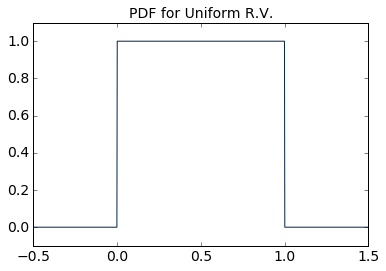

In [40]:
from scipy.stats import uniform
x = np.linspace(-0.5,1.5,1000)
plt.plot(x,uniform.pdf(x), color=blue)
plt.axis([-0.5,1.5,-0.1,1.1])
plt.title("PDF for Uniform R.V.")
plt.show()

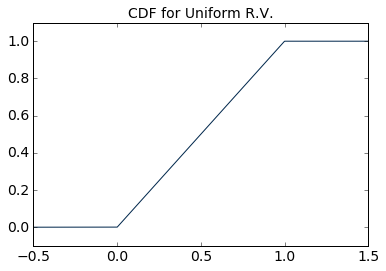

In [44]:
plt.plot(x,uniform.cdf(x), color=blue)
plt.axis([-0.5,1.5,-0.1,1.1])
plt.title("CDF for Uniform R.V.")
plt.show()

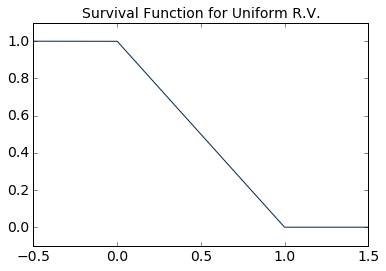

In [43]:
plt.plot(x,uniform.sf(x), color=blue)
plt.axis([-0.5,1.5,-0.1,1.1])
plt.title("Survival Function for Uniform R.V.")
plt.show()

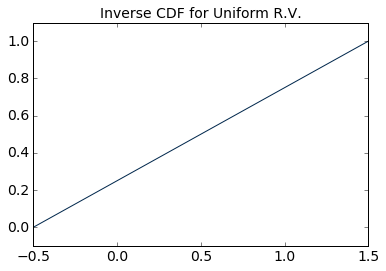

In [47]:
xi = np.linspace(0,1,1000)
plt.plot(x,1-uniform.isf(xi), color=blue)
plt.axis([-0.5,1.5,-0.1,1.1])
plt.title("Inverse CDF for Uniform R.V.")
plt.show()

# Normal (Gaussian) Random Variables

Python with Numpy also has functions for sampling from a normal random variable. The function is `np.random.normal(loc = 0, scale = 1, size)` to get `size` samples from a normal random variable with mean `loc` and standard deviation `scale`.  Notice that the default is a standard normal random variable.

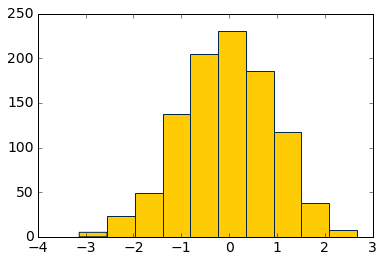

In [51]:
N = 1000
df = np.random.normal(size = N)
plt.hist(df, facecolor = maize, edgecolor = blue)
plt.show()

To evaluate the PDF, CDF, and inverse CDF for a  normal random variable we can use SciPy's `stats.norm` library.

- `norm.pdf(x, loc=0, scale = 1)` returns the probability density for a normal random variable with mean `loc` and standard deviation `scale`
- `norm.cdf(x, loc=0, scale = 1)` returns the cumulative distribution for a normal random variable with mean `loc` and standard deviation `scale`
- `norm.sf(x, loc=0, scale = 1)` returns the survival function (1-CDF) for a normal random variable with mean `loc` and standard deviation `scale`
- `norm.isf(x, loc=0, scale = 1)` returns the inverse of the survival function for a normal random variable with mean `loc` and standard deviation `scale`



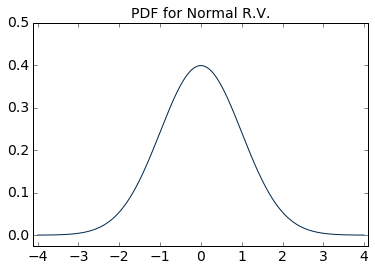

In [56]:
from scipy.stats import norm
x = np.linspace(-4,4,1000)
plt.plot(x,norm.pdf(x), color=blue)
plt.axis([-4.1,4.1,-0.025,0.5])
plt.title("PDF for Normal R.V.")
plt.show()

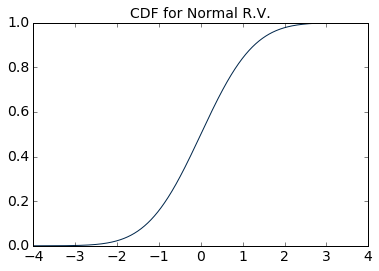

In [57]:
plt.plot(x,norm.cdf(x), color=blue)
plt.title("CDF for Normal R.V.")
plt.show()

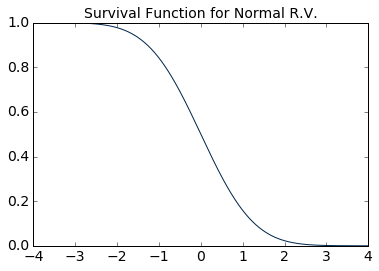

In [58]:
plt.plot(x,norm.sf(x), color=blue)
plt.title("Survival Function for Normal R.V.")
plt.show()

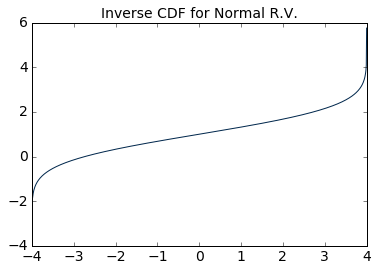

In [59]:
xi = np.linspace(1e-6,1-1e-6,1000)
plt.plot(x,1-norm.isf(xi), color=blue)
plt.title("Inverse CDF for Normal R.V.")
plt.show()

# Other Distributions
Scipy also has many other distributions that you can evaluate in its `stats` library.  The available distributions include
- Beta: `beta`
- Binomial: `binom`
- Cauchy: `cauchy`
* Exponential: `expon`
* Gamma: `gamma`
* Possion: `poisson`

# Multivariate Normal

To sample from a multivariate normal we can use the Numpy function `random.multivariate_normal(mean, cov, size)` to generate `size` samples from a multivariate normal with mean vector `mean` and covariance matrix `cov`. If `mean` is of length `p`, then `cov` must be `p` by `p`.

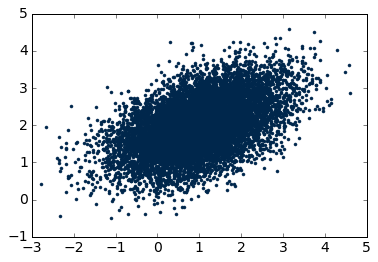

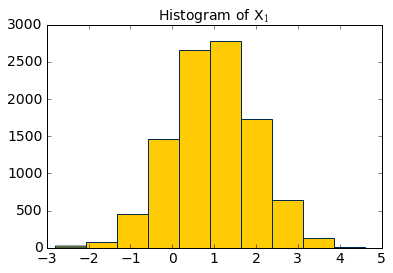

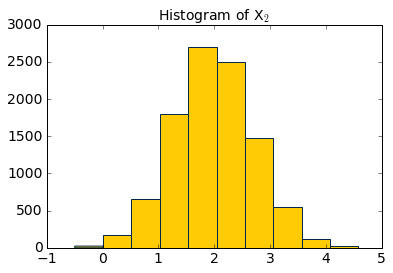

In [68]:
N = 10**4
mean = (1, 2)
cov = [[1, 0.35], [0.35, 0.5]]
df = np.random.multivariate_normal(mean, cov, N)
plt.plot(df[:,0], df[:,1],'.', color=blue)
plt.show()
plt.hist(df[:,0], facecolor=maize, edgecolor=blue)
plt.title("Histogram of X$_1$")
plt.show()
plt.hist(df[:,1], facecolor=maize, edgecolor=blue)
plt.title("Histogram of X$_2$")
plt.show()